In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### I add the taxonomic information to the genomes that have iroN, then I create figures to visualize the distribution of the gene in Enterobacteriaceae ####

In [ ]:
# In case that I want to reset the kernel

%reset -f

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
### Read the taxonomic information files ####

pathEnterobacteriaceae = '/mnt/mnemo6/nnaepf/for_eugenio/tax_info_complete.txt'

# This information will be saved as dictionary with the following structure:
# taxonomic identity number : [taxomic identities in the different taxonomic levels]
with open(pathEnterobacteriaceae) as f:
    enterTaxInfoList = f.readlines()

enterTaxInfo = {}
for i in enterTaxInfoList:
    line = i.split('\t')
    enterTaxInfo[line[0]] = line[1].split(';')
    print(enterTaxInfo[line[0]][-3])

# enterTaxInfo[x][-2] = species level
# enterTaxInfo[x][-3] = genus level

Cronobacter
Klebsiella/Raoultella group
Rahnella
Enterobacteriaceae
Cronobacter
Salmonella
Serratia
Candidatus Hamiltonella defensa
Klebsiella
Escherichia
Salmonella bongori
Salmonella
Salmonella
Kosakonia
Yersinia
Salmonella
Cedecea
Lelliottia
Escherichia
Kosakonia
Salmonella bongori
Enterobacteriaceae
Escherichia
Enterobacter cloacae complex
Salmonella
Salmonella
Kosakonia
Enterobacter cloacae complex
Serratia
Yersinia pseudotuberculosis complex
Shigella
Shigella
Pluralibacter
Kluyvera
Cronobacter
aphid secondary symbionts
Salmonella bongori
Enterobacter hormaechei
Escherichia
Escherichia coli
Kosakonia
Klebsiella
Klebsiella/Raoultella group
Enterobacteriaceae
Yersinia
Yersinia
Yersiniaceae
Yersiniaceae
Yersiniaceae
Kosakonia
Enterobacteriaceae
Enterobacteriaceae
Enterobacteriaceae
Cedecea
Salmonella
Enterobacter
Enterobacteriaceae
Enterobacteriaceae
Enterobacter
Rahnella
Rahnella
Leclercia
Citrobacter
Enterobacteriaceae
Klebsiella
Enterobacteriaceae
Enterobacter cloacae complex
Ente

In [ ]:
#### Read the iroN taxonomy identity numbers file ####
pathEnterobacteriaceae = '/mnt/mnemo5/eugenio/IroN_project/Files/04_Blast_annotations/enterobacteriaceae_blasted_sequences.taxonomy_identity_numbers.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathEnterobacteriaceae) as f:
    iroNtaxInfo = f.readlines()

for i in range(len(iroNtaxInfo)):
    iroNtaxInfo[i] = iroNtaxInfo[i].strip()

# Let's remove the repeated information, some genomes have multiple hits of iroN,
# and that messes up the percentage of genera/sp with iroN
iroNtaxInfo = list(set(iroNtaxInfo))
print(len(iroNtaxInfo))

# Then I can create a new list with the taxonomic information for each genome that has iroN, I'll count the repeated taxa to get how many genomes with iroN are present in each taxon
# And a dictionary: key(taxon) : value(list with two values: genomes iroN with and total genomes)
# Then I can create a bar plot with the taxonomic information

In [ ]:
### Create a list of taxonomic information for the genomes that have iroN,
# the proportion of genomes with iroN per sp and genus and the number of genomes with iroN ####

# The total number of genomes available per sp and genus

# Genus
genusList = []
for i in enterTaxInfo:
    genusList.append(enterTaxInfo[i][-3])

# I have sp and strange things at this level, I'll standarize everything, so I will only have genera and not sp
genusList = [genus.split()[0] for genus in genusList]

countsGenus = {}
for string in genusList:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

# Species
speciesList = []
for i in enterTaxInfo:
    speciesList.append(enterTaxInfo[i][-2])

countsSpecies = {}  
for string in speciesList:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Create the list of taxonomic information for the genomes that have iroN
iroNtaxInfoGenus = []
iroNtaxInfoSpecies = []
for i in iroNtaxInfo:
    iroNtaxInfoGenus.append(enterTaxInfo[i][-3])
    iroNtaxInfoSpecies.append(enterTaxInfo[i][-2])

# Now let's make sure that I only have genera in the genus level
iroNtaxInfoGenus = [genus.split()[0] for genus in iroNtaxInfoGenus]

# Count the number of genomes with iroN per sp and genus
countsGenusIroN = {}
for string in iroNtaxInfoGenus:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

countsSpeciesIroN = {}
for string in iroNtaxInfoSpecies:
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

In [ ]:
### The same but for Salmonella ###

# Let's read the list of Salmonella genomes that have iroN
pathSalmonella = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Accession_NCBI_codes_for_salmonella_present_in_fasta_file.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathSalmonella) as f:
    salmonellaTaxInfo = f.readlines()
salmonellaTaxInfo = [i.strip() for i in salmonellaTaxInfo]
print(salmonellaTaxInfo[0:10])

# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

# Create a list of taxonomic information for the total Salmonella genomes with Salmonella
speciesListIroN = []
for i in salmonellaTaxInfo:
    speciesListIroN.append(salmonellaTaxInfoDict[i][0])

genusListIroN = []
for i in salmonellaTaxInfo:
    genusListIroN.append(salmonellaTaxInfoDict[i][1])

# And let's count the total number of genomes per sp and genus
salmonellaGenusTotal = []
for i in metadata:
    salmonellaGenusTotal.append(i[3])
salmonellaSpTotal = []
for i in metadata:
    salmonellaSpTotal.append(i[2])

# I'll keep using the dictionaries countsGenus and countsSpecies from the last cell
for string in salmonellaGenusTotal:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

for string in salmonellaSpTotal:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Count the number of genomes per sp and genus with the same dictionaries countsGenusIroN and countsSpeciesIroN
for string in genusListIroN:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

for string in speciesListIroN:
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

In [ ]:
### Final details for the lists ###

# So some genera names are butched, I'll fix them
countsGenus['Candidatus Hamiltonella'] = countsGenus['Candidatus']
del countsGenus['Candidatus']

countsGenus['aphid secondary symbionts'] = countsGenus['aphid']
del countsGenus['aphid']

# And let's add the genera that don't have iroN
for i in list(countsGenus.keys()):
    if i not in list(countsGenusIroN.keys()):
        countsGenusIroN[i] = 0

# And let's add the species that don't have iroN
for i in list(countsSpecies.keys()):
    if i not in list(countsSpeciesIroN.keys()):
        countsSpeciesIroN[i] = 0

In [ ]:
#### Now let's get the proportion of genus/sp with iroN
proportionGenusIroN = {}
for i in countsGenusIroN:
    proportionGenusIroN[i] = countsGenusIroN[i] / countsGenus[i] * 100

proportionSpeciesIroN = {}
for i in countsSpeciesIroN:
    proportionSpeciesIroN[i] = countsSpeciesIroN[i] / countsSpecies[i] * 100

# Let's print the results
print(proportionGenusIroN)
print(proportionSpeciesIroN)

In [ ]:
### Let's graph the results ###

# Data for the plot
categories = list(proportionGenusIroN.keys())
percentages = list(proportionGenusIroN.values())

# Create the horizontal bar plot
plt.barh(categories, percentages, color='blue')

# Set the labels and title
plt.xlabel('Proportion (%)')
plt.ylabel('Genus')
plt.title('Proportion of Genus with iroN')

# Display the plot
plt.show()

In [ ]:
### Let's save the results ###

# Data for the pandas dataframe
dataGenus = {'Genus': list(countsGenus.keys()), 'Total genomes': list(countsGenus.values()), 'Genomes with iroN': list(countsGenusIroN.values()), 'Proportion (%)': list(proportionGenusIroN.values())}
dataSpecies = {'Species': list(countsSpecies.keys()), 'Total genomes': list(countsSpecies.values()), 'Genomes with iroN': list(countsSpeciesIroN.values()), 'Proportion (%)': list(proportionSpeciesIroN.values())}

# Create the pandas dataframes
dfGenus = pd.DataFrame(dataGenus)
dfSpecies = pd.DataFrame(dataSpecies)

# Save the dataframes as csv files
pathGenus = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Genus_iroN_proportion.csv'
pathSp = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Species_iroN_proportion.csv'

dfGenus.to_csv(pathGenus, index=False)
dfSpecies.to_csv(pathSp, index=False)

I'll do a quick heatmap of the promoters

In [2]:
# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

In [5]:
enteroPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Promoters_enterobacteriaceae_grabby_df.tsv'
salmoPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Promoters_salmonella_grabby_df.tsv'

# Let's read the dataframes
dfEntero = pd.read_csv(enteroPath, sep='\t')
dfSalmo = pd.read_csv(salmoPath, sep='\t')

# Let's change the name of the column with the genome names
dfEntero = dfEntero.rename(columns={'Unnamed: 0' : 'Genome'})
dfSalmo = dfSalmo.rename(columns={'Unnamed: 0' : 'Genome'})

dfEntero['Genome'] = dfEntero['Genome'].astype(str)

# Let's replace the genome codes with sp names, I need the dictionary enterTaxInfo
for i in enterTaxInfo:
    dfEntero = dfEntero.replace(i, enterTaxInfo[i][-2])

print(dfEntero)

                             Genome  arcA  argR  argR2  crp  cysB  fis  fnr  \
0                       Cronobacter     0     1      1    1     0    1    1   
1      Enterobacter cloacae complex     0     1      0    1     1    1    1   
2                        Klebsiella     0     0      0    0     0    0    0   
3                          Serratia     0     0      0    0     0    0    0   
4                        Klebsiella     0     1      0    0     0    0    0   
5                Salmonella bongori     0     0      0    0     0    0    0   
6                        Salmonella     1     0      1    0     0    0    0   
7           Enterobacter hormaechei     0     0      0    0     0    0    0   
8   unclassified Enterobacteriaceae     0     0      1    0     0    0    0   
9      Citrobacter freundii complex     0     0      0    1     0    0    0   
10          Enterobacter hormaechei     1     0      1    1     0    0    0   
11              Citrobacter youngae     0     0     

In [6]:
# Let's do the same for Salmonella
pathNCBIcodes = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Salmonella_header_NCBIcode.csv'

# Create the dictionary with the NCBI codes
with open(pathNCBIcodes, 'r') as f:
    lines = f.readlines()
    headerToNCBIcodeSalmo = {}
    for line in lines:
        line = line.strip().split(',')
        headerToNCBIcodeSalmo[line[0]] = line[1]

# Now let's replace the genome codes with the NCBI taxonomic codes
dfSalmo['Genome'] = dfSalmo['Genome'].astype(str) + ".1"
for i in headerToNCBIcodeSalmo:
    dfSalmo = dfSalmo.replace(i, headerToNCBIcodeSalmo[i])

for i in salmonellaTaxInfoDict:
    dfSalmo = dfSalmo.replace(i, salmonellaTaxInfoDict[i][0] + '-' + i)
print(dfSalmo)

                                   Genome  arcA  argR  argR2  cpxR  crp  cspA  \
0     Salmonella enterica-GCA_019301615.1     0     0      0     0    0     0   
1     Salmonella enterica-GCA_006499835.1     0     0      0     0    0     0   
2     Salmonella enterica-GCA_007619255.1     0     0      0     0    0     0   
3     Salmonella enterica-GCA_007866345.1     0     0      0     1    0     0   
4     Salmonella enterica-GCA_007314675.1     0     0      0     0    0     0   
...                                   ...   ...   ...    ...   ...  ...   ...   
1186  Salmonella enterica-GCA_019404425.1     0     0      0     0    0     0   
1187  Salmonella enterica-GCA_011156295.1     0     0      0     0    0     0   
1188  Salmonella enterica-GCA_008021615.1     1     0      0     0    0     0   
1189  Salmonella enterica-GCA_007335195.1     0     0      0     0    0     0   
1190  Salmonella enterica-GCA_015527625.1     0     0      0     0    0     0   

      cynR  deoR  farR  ...

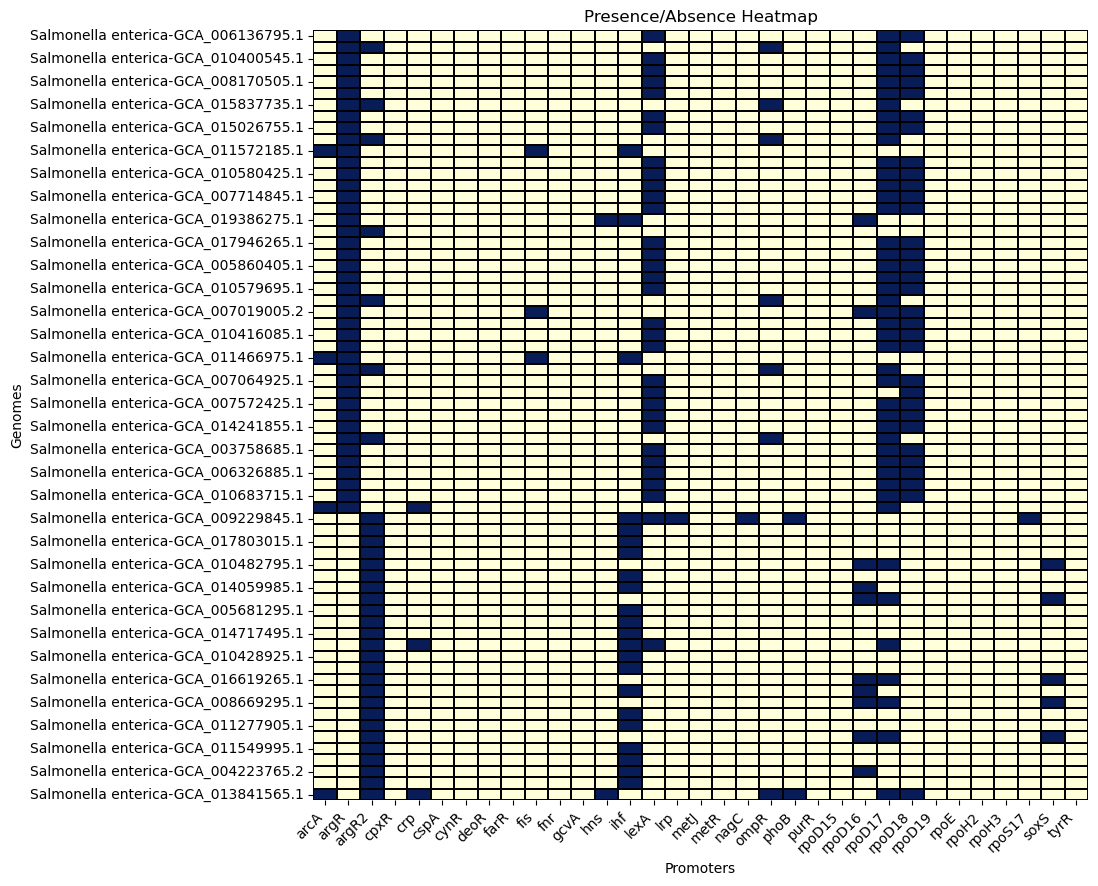

In [19]:
filtered_df = dfSalmo[(dfSalmo['argR'] == 1) | (dfSalmo['argR2'] == 1)]
sorted_df = filtered_df.sort_values(by='argR', ascending=False)
df_pivot = sorted_df.set_index('Genome')

# Create the heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_pivot, cmap="YlGnBu", annot=False, cbar=False, linewidths=0.1, linecolor='black', xticklabels=True)

# In case I want to tick the x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Remove the y-axis labels completely
# ax.set_yticks([])
# ax.set_yticklabels([])

# Customize the heatmap (optional)
plt.title('Presence/Absence Heatmap')
plt.xlabel('Promoters')
plt.ylabel('Genomes')

# Show the plot
plt.show()

In [71]:
print(filtered_df)

                                   Genome  arcA  argR  argR2  cpxR  ihf  lexA  \
56    Salmonella enterica-GCA_013142105.1     0     0      1     0    0     0   
266   Salmonella enterica-GCA_019696225.1     0     0      1     0    0     0   
279   Salmonella enterica-GCA_019383955.1     0     0      1     0    0     0   
566   Salmonella enterica-GCA_015837735.1     0     0      1     0    0     0   
610   Salmonella enterica-GCA_005607795.1     0     0      1     0    0     0   
665   Salmonella enterica-GCA_013746845.1     0     0      1     0    0     0   
721   Salmonella enterica-GCA_008669295.1     0     0      1     0    0     0   
758   Salmonella enterica-GCA_016619265.1     0     0      1     0    0     0   
787   Salmonella enterica-GCA_014612855.1     0     0      1     0    0     0   
856   Salmonella enterica-GCA_019386275.1     0     1      0     0    0     0   
871   Salmonella enterica-GCA_011728295.1     0     1      0     0    0     0   
948   Salmonella enterica-GC